In [1]:
import sys
import os 
sys.path.append('..')  #adds the Root Directory to the system path
from BL_CalciumAnalysis.image_analysis_methods import ImageAnalysis

In [2]:
from PIL import Image

In [3]:
print(sys.executable) #print the path of the Python executable being used, which should point to the Python interpreter in your Conda environment.

/Users/cresp1el/anaconda3/envs/biolumi_calcium_imaging/bin/python


In [4]:
project_folder = '/Volumes/MannySSD/cablam_imaging/raw_data_for_analysis' #path to the folder containing the raw data to be analyzed (i.e. the folder containing the folders for each experiment)
analysis = ImageAnalysis(project_folder)

print(analysis.directory_df)
analysis.directory_df

                       directory_name  \
0      g21_12072023_estim_10hz_na_blk   
1      g22_12072023_estim_10hz_na_blk   
2      g23_12072023_estim_10hz_na_blk   
3    c33_12092023_estim_10hz_1xfz_blk   
4  c33_12092023_estim_10hz_1xfz_blk_1   
5    c32_12092023_estim_10hz_1xfz_blk   
6    c31_12092023_estim_10hz_1xfz_blk   

                                      directory_path  
0  /Volumes/MannySSD/cablam_imaging/raw_data_for_...  
1  /Volumes/MannySSD/cablam_imaging/raw_data_for_...  
2  /Volumes/MannySSD/cablam_imaging/raw_data_for_...  
3  /Volumes/MannySSD/cablam_imaging/raw_data_for_...  
4  /Volumes/MannySSD/cablam_imaging/raw_data_for_...  
5  /Volumes/MannySSD/cablam_imaging/raw_data_for_...  
6  /Volumes/MannySSD/cablam_imaging/raw_data_for_...  


,directory_name,directory_path
0,g21_12072023_estim_10hz_na_blk,/Volumes/MannySSD/cablam_imaging/raw_data_for_...
1,g22_12072023_estim_10hz_na_blk,/Volumes/MannySSD/cablam_imaging/raw_data_for_...
2,g23_12072023_estim_10hz_na_blk,/Volumes/MannySSD/cablam_imaging/raw_data_for_...
3,c33_12092023_estim_10hz_1xfz_blk,/Volumes/MannySSD/cablam_imaging/raw_data_for_...
4,c33_12092023_estim_10hz_1xfz_blk_1,/Volumes/MannySSD/cablam_imaging/raw_data_for_...
5,c32_12092023_estim_10hz_1xfz_blk,/Volumes/MannySSD/cablam_imaging/raw_data_for_...
6,c31_12092023_estim_10hz_1xfz_blk,/Volumes/MannySSD/cablam_imaging/raw_data_for_...


In [5]:
# Since the folders are directly inside the project_folder, you don't need to append any subdirectory name
data_files = analysis.list_files('') 
print(data_files) #print the list of files in the project folder 

directories = analysis.list_directories()
print(directories) #print the list of directories in the project folder

['/Volumes/MannySSD/cablam_imaging/raw_data_for_analysis/g21_12072023_estim_10hz_na_blk/g21_12072023_estim_10hz_na_blk_fluor_combined.tif', '/Volumes/MannySSD/cablam_imaging/raw_data_for_analysis/g21_12072023_estim_10hz_na_blk/g21_12072023_estim_10hz_na_blk_fluor.csv', '/Volumes/MannySSD/cablam_imaging/raw_data_for_analysis/g21_12072023_estim_10hz_na_blk/._g21_12072023_estim_10hz_na_blk_fluor.csv', '/Volumes/MannySSD/cablam_imaging/raw_data_for_analysis/g22_12072023_estim_10hz_na_blk/g22_12072023_estim_10hz_na_blk_fluor_combined.tif', '/Volumes/MannySSD/cablam_imaging/raw_data_for_analysis/g22_12072023_estim_10hz_na_blk/g22_12072023_estim_10hz_na_blk_fluor.csv', '/Volumes/MannySSD/cablam_imaging/raw_data_for_analysis/g23_12072023_estim_10hz_na_blk/g23_12072023_estim_10hz_na_blk.tif', '/Volumes/MannySSD/cablam_imaging/raw_data_for_analysis/g23_12072023_estim_10hz_na_blk/g23_12072023_estim_10hz_na_blk_fluor.csv', '/Volumes/MannySSD/cablam_imaging/raw_data_for_analysis/c33_12092023_estim_

In [18]:
# Assuming analysis is an instance of ImageAnalysis
first_row = analysis.directory_df.iloc[3]
directory_path = first_row['directory_path']

# Automatically generate file paths based on the directory path
dark_frames_path = os.path.join(directory_path, "dark_frames.tiff")
raw_image_path = os.path.join(directory_path, "raw_image.tiff")

print("dark_frames_path:", dark_frames_path)
print("raw_image_path:", raw_image_path)

tiff_path = '/Volumes/MannySSD/cablam_imaging/raw_data_for_analysis/c31_12092023_estim_10hz_1xfz_blk/c31_12092023_estim_10hz_1xfz_blk_biolumi_combined.tif'

# Generate the dark image
dark_image = analysis.generate_dark_image(tiff_path) #generates a dark image from the first 200 frames of the tiff file 

dark_frames_path: /Volumes/MannySSD/cablam_imaging/raw_data_for_analysis/c33_12092023_estim_10hz_1xfz_blk/dark_frames.tiff
raw_image_path: /Volumes/MannySSD/cablam_imaging/raw_data_for_analysis/c33_12092023_estim_10hz_1xfz_blk/raw_image.tiff


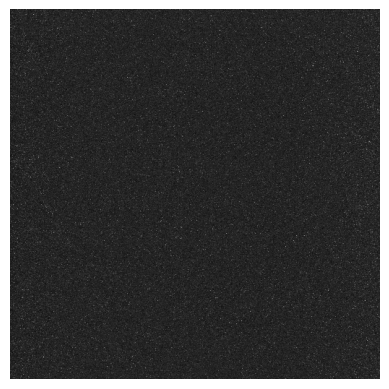

In [19]:
import matplotlib.pyplot as plt
# Display the dark image
plt.imshow(dark_image, cmap='gray')
plt.axis('off')
plt.show()


In [20]:
import numpy as np
from PIL import Image
import cv2

def subtract_dark_image_optimized(raw_tiff_path, dark_image):
    """
    Subtracts a 'dark' image from each frame of a multi-frame TIFF file using optimized NumPy operations.

    Parameters:
    raw_tiff_path (str): Path to the raw multi-frame TIFF file.
    dark_image (numpy.ndarray): The 'dark' image to be subtracted from each frame.

    Returns:
    numpy.ndarray: An array of images, each representing a frame from the raw image with the dark image subtracted.
    """
    with Image.open(raw_tiff_path) as img:
        # Pre-allocate memory for all frames (assuming all frames have the same size as the dark image)
        compensated_images = np.empty((img.n_frames, *dark_image.shape), dtype=dark_image.dtype)

        for i in range(img.n_frames):
            img.seek(i)
            # Convert directly to NumPy array
            frame = np.array(img, dtype=dark_image.dtype)
            # In-place subtraction
            np.subtract(frame, dark_image, out=frame)
            compensated_images[i] = frame

        return compensated_images

# run the function
compensated_images = subtract_dark_image_optimized(tiff_path, dark_image)

KeyboardInterrupt: 